In [1]:
from clustering.preprocess import Preprocess
from clustering.kmeans import KMeansClustering
from clustering.lda import LDA
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
data = Preprocess.open_pickle("F:\Development\smart_rejector_for_hate_speech\/twitter_data.pkl")
filtered_data = Preprocess.filter_waseem_hovy(X=data, label='sexism')
tweets = [x['text'] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 16089
INFO:root:After applying filters: 3117
INFO:root:Data length after removing invalid tweets: 582
INFO:root:Explained variance of the SVD step: 44%


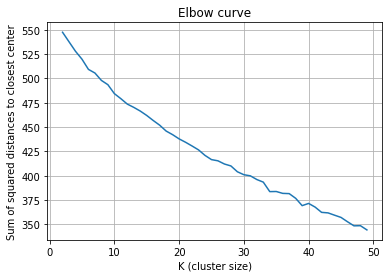

In [3]:
%matplotlib inline
km.plot_elbow_curve(max_k=50, X=X)

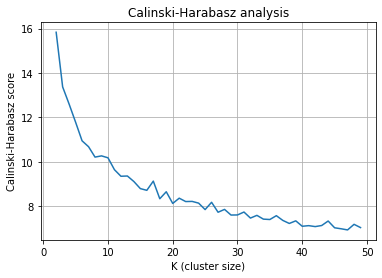

In [4]:
%matplotlib inline
# Higher values are better, when clusters are dense and well separated
km.plot_calinski_harabasz_analysis(max_k=50, X=X)

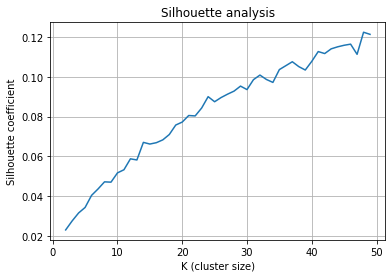

In [5]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=50, X=X)

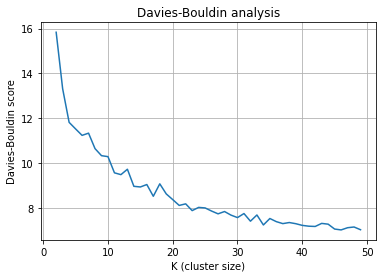

In [6]:
%matplotlib inline
# Values close to zero indicate a better partition
km.plot_davies_bouldin_score_analysis(max_k=50, X=X)

In [7]:
K = 5
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 just blonde think annie like celine bitch does bitches dumb

Cluster 1:
 kat andre bitch face fuck karma like fucking hate awful

Cluster 2:
 katie nikki maybe model andre going shame trashy massive cheap

Cluster 3:
 blondes hot pretty faces dumb young just natural proved really

Cluster 4:
 girls promo think cook fucktards going pretty did need sass



In [8]:
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=5)

Cluster 0: most representative sample indices: [421 288 468  86 218]
{'text': 'these girls are fucktards !  !  #mkr', 'label': 'sexism'}

{'text': '"do you think the other teams are going to pick on the pretty girls tonight ? "  are there some other girls coming to dinner ?  #mkr', 'label': 'sexism'}

{'text': 'i should start a drinking game..  everytime the girls compliment themselves skull. i would not be in great shape tomz tho 😳 #mkr2015 #mkr', 'label': 'sexism'}

{'text': 'who was responsible for convincing these girls they were so pretty ?  #mkr', 'label': 'sexism'}

{'text': '#mkr was not a fan of the promo girls ,  but kat is worse  !', 'label': 'sexism'}


Cluster 1: most representative sample indices: [476 112 304 156 173]
{'text': 'can kat get any nastier ?  #mkr', 'label': 'sexism'}

{'text': 'kat is a sociopath #mkr', 'label': 'sexism'}

{'text': 'and cop that ,  kat #mkr', 'label': 'sexism'}

{'text': 'meanwhile ,  kat is poisoning the lake #mkr', 'label': 'sexism'}

{'te

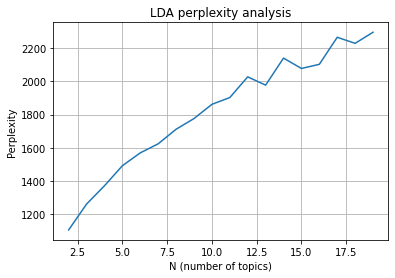

In [10]:
lda = LDA()
X = lda.fit_tf(X=cleaned_data)
# Lower values are better
# Perplexity indicates how well the probability model predicts the samples
lda.plot_perplexity(max_n=20, X=X)

In [11]:
pred = lda.fit_lda(X=X, n_components=10)
lda.print_top_terms()

Topic:  0
['nikki', 'really', 'bitch', 'just', 'men', 'pretty', 'kat', 'katie', 'model', 'hope']
Topic:  1
['kat', 'bitch', 'andre', 'just', 'fuck', 'like', 'shit', 'think', 'nasty', 'people']
Topic:  2
['tonight', 'kat', 'seriously', 'think', 'just', 'annie', 'does', 'know', 'sassy', 'perfect']
Topic:  3
['kat', 'andre', 'blonde', 'cooking', 'annie', 'just', 'like', 'look', 'girls', 'face']
Topic:  4
['kat', 'person', 'blonde', 'lloyd', 'karma', 'andre', 'bitch', 'annie', 'fuck', 'like']
Topic:  5
['kat', 'tarts', 'blondes', 'models', 'did', 'girls', 'andre', 'want', 'annie', 'right']
Topic:  6
['kat', 'face', 'girls', 'year', 'oh', 'better', 'looking', 'smile', 'want', 'dress']
Topic:  7
['kat', 'eyes', 'crazy', 'cunt', 'does', 'celine', 'andre', 'face', 'just', 'short']
Topic:  8
['kat', 'girls', 'promo', 'hot', 'like', 'fucking', 'blonde', 'shit', 'young', 'blondes']
Topic:  9
['blondes', 'katie', 'nikki', 'pretty', 'think', 'girls', 'just', 'dumb', 'faces', 'kat']
